# 过拟合欠拟合及其解决方案

1.过拟合、欠拟合的概念

2.权重衰减

3.丢弃法

# 模型选择、过拟合和欠拟合

## 训练误差和泛化误差
在解释上述现象之前，我们需要区分训练误差（training error）和泛化误差（generalization error）。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意一个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使用之前介绍过的损失函数，例如线性回归用到的平方损失函数和softmax回归用到的交叉熵损失函数。

机器学习模型应关注降低泛化误差。

## 模型选择
### 验证数据集
从严格意义上讲，测试集只能在所有超参数和模型参数选定后使用一次。不可以使用测试数据选择模型，如调参。由于无法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留一部分在训练数据集和测试数据集以外的数据来进行模型选择。这部分数据被称为验证数据集，简称验证集（validation set）。例如，我们可以从给定的训练集中随机选取一小部分作为验证集，而将剩余部分作为真正的训练集。

### K折交叉验证  
由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是K折交叉验证（K-fold cross-validation）。在K折交叉验证中，我们把原始训练数据集分割成K个不重合的子数据集，然后我们做K次模型训练和验证。每一次，我们使用一个子数据集验证模型，并使用其他K-1个子数据集来训练模型。在这K次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这K次训练误差和验证误差分别求平均。
## 过拟合和欠拟合
接下来，我们将探究模型训练中经常出现的两类典型问题：
- 一类是模型无法得到较低的训练误差，我们将这一现象称作欠拟合（underfitting）；
- 另一类是模型的训练误差远小于它在测试数据集上的误差，我们称该现象为过拟合（overfitting）。
在实践中，我们要尽可能同时应对欠拟合和过拟合。虽然有很多因素可能导致这两种拟合问题，在这里我们重点讨论两个因素：模型复杂度和训练数据集大小。

### 模型复杂度
为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征$x$和对应的标量标签$y$组成的训练数据集，多项式函数拟合的目标是找一个$K$阶多项式函数


$$
 \hat{y} = b + \sum_{k=1}^K x^k w_k 
$$


来近似 $y$。在上式中，$w_k$是模型的权重参数，$b$是偏差参数。与线性回归相同，多项式函数拟合也使用平方损失函数。特别地，一阶多项式函数拟合又叫线性函数拟合。

给定训练数据集，模型复杂度和误差之间的关系：

![avatar][base64str]
[base64str]: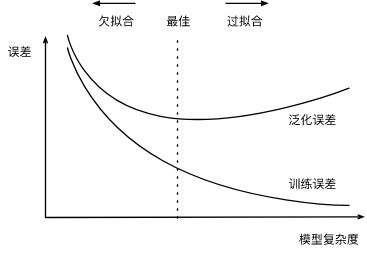

### 训练数据集大小
影响欠拟合和过拟合的另一个重要因素是训练数据集的大小。一般来说，如果训练数据集中样本数过少，特别是比模型参数数量（按元素计）更少时，过拟合更容易发生。此外，泛化误差不会随训练数据集里样本数量增加而增大。因此，在计算资源允许的范围之内，我们通常希望训练数据集大一些，特别是在模型复杂度较高时，例如层数较多的深度学习模型。

# 权重衰减
## 方法  
权重衰减等价于 $L_2$ 范数正则化（regularization）。正则化通过为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段。

##  L2 范数正则化（regularization）
$L_2$范数正则化在模型原损失函数基础上添加$L_2$范数惩罚项，从而得到训练所需要最小化的函数。$L_2$范数惩罚项指的是模型权重参数每个元素的平方和与一个正的常数的乘积。以线性回归中的线性回归损失函数为例


$$
 \ell(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right)^2 
$$


其中$w_1, w_2$是权重参数，$b$是偏差参数，样本$i$的输入为$x_1^{(i)}, x_2^{(i)}$，标签为$y^{(i)}$，样本数为$n$。将权重参数用向量$\boldsymbol{w} = [w_1, w_2]$表示，带有$L_2$范数惩罚项的新损失函数为


$$
\ell(w_1, w_2, b) + \frac{\lambda}{2n} |\boldsymbol{w}|^2,
$$


其中超参数$\lambda > 0$。当权重参数均为0时，惩罚项最小。当$\lambda$较大时，惩罚项在损失函数中的比重较大，这通常会使学到的权重参数的元素较接近0。当$\lambda$设为0时，惩罚项完全不起作用。上式中$L_2$范数平方$|\boldsymbol{w}|^2$展开后得到$w_1^2 + w_2^2$。
有了$L_2$范数惩罚项后，在小批量随机梯度下降中，我们将线性回归一节中权重$w_1$和$w_2$的迭代方式更改为


$$
 \begin{aligned} w_1 &\leftarrow \left(1- \frac{\eta\lambda}{|\mathcal{B}|} \right)w_1 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_1^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\ w_2 &\leftarrow \left(1- \frac{\eta\lambda}{|\mathcal{B}|} \right)w_2 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_2^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right). \end{aligned} 
$$


可见，$L_2$范数正则化令权重$w_1$和$w_2$先自乘小于1的数，再减去不含惩罚项的梯度。因此，$L_2$范数正则化又叫权重衰减。权重衰减通过惩罚绝对值较大的模型参数为需要学习的模型增加了限制，这可能对过拟合有效。


# 丢弃法

多层感知机中神经网络图描述了一个单隐藏层的多层感知机。其中输入个数为4，隐藏单元个数为5，且隐藏单元$h_i$（$i=1, \ldots, 5$）的计算表达式为


$$
 h_i = \phi\left(x_1 w_{1i} + x_2 w_{2i} + x_3 w_{3i} + x_4 w_{4i} + b_i\right) 
$$


这里$\phi$是激活函数，$x_1, \ldots, x_4$是输入，隐藏单元$i$的权重参数为$w_{1i}, \ldots, w_{4i}$，偏差参数为$b_i$。当对该隐藏层使用丢弃法时，该层的隐藏单元将有一定概率被丢弃掉。设丢弃概率为$p$，那么有$p$的概率$h_i$会被清零，有$1-p$的概率$h_i$会除以$1-p$做拉伸。丢弃概率是丢弃法的超参数。具体来说，设随机变量$\xi_i$为0和1的概率分别为$p$和$1-p$。使用丢弃法时我们计算新的隐藏单元$h_i'$


$$
 h_i' = \frac{\xi_i}{1-p} h_i 
$$


由于$E(\xi_i) = 1-p$，因此


$$
 E(h_i') = \frac{E(\xi_i)}{1-p}h_i = h_i 
$$


即丢弃法不改变其输入的期望值。让我们对之前多层感知机的神经网络中的隐藏层使用丢弃法，一种可能的结果如图所示，其中$h_2$和$h_5$被清零。这时输出值的计算不再依赖$h_2$和$h_5$，在反向传播时，与这两个隐藏单元相关的权重的梯度均为0。由于在训练中隐藏层神经元的丢弃是随机的，即$h_1, \ldots, h_5$都有可能被清零，输出层的计算无法过度依赖$h_1, \ldots, h_5$中的任一个，从而在训练模型时起到正则化的作用，并可以用来应对过拟合。在测试模型时，我们为了拿到更加确定性的结果，一般不使用丢弃法

![avater][base64str]
[base64str]: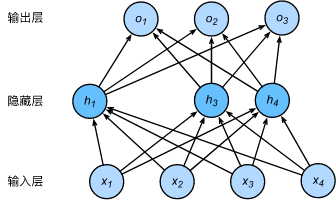


# 总结

- 欠拟合现象：模型无法达到一个较低的误差
    
- 过拟合现象：训练误差较低但是泛化误差依然较高，二者相差较大

# 讨论
### 1.为什么优化器中只对权重参数设置衰减，而不对偏置参数设置衰减呢？
- 对偏置增加正则也是可以的，但是对偏置增加正则不会明显的产生很好的效果。而且偏置并不会像权重一样对数据非常敏感，所以不用担心偏置会学习到数据中的噪声。而且大的偏置也会使得我们的网络更加灵活，所以一般不对偏置做正则化。

- 因为w通常是一个高维参数矢量，已经可以表达高偏差问题，w可能包含有很多参数，我们不可能拟合所有参数，而b只是单个数字，所以w几乎涵盖所有参数，而不是b，如果加了参数b，其实也没太大影响，因为b只是众多参数中的一个，所以通常省略不计，如果你想加上这个参数，完全没问题。

### 2.训练集，测试集， 验证集
按照最开始的说法，训练集，测试集（用来测试训练成果），验证集（用来训练超参数或者选择模型），但K折交叉验证为什么只有k-1个训练和1个验证，没有测试集？“。在这K次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这K次训练误差和验证误差分别求平均。”那么这里的k次训练误差是哪里来的呢？

- 正常的训练过程是分为训练数据和测试数据，但是如果只使用训练数据得到的模型效果不一定是最好的，所以在训练集中划分出验证集，训练集和验证集的划分有很多中，但是最常用的就是k折交叉验证，就是把训练数据分成k份，用其中的 k-1份训练模型，用剩下的一份来验证模型的泛化能力，循环操作，选择最佳的超参数组合，之后再用全部数据训练得到一个模型，再用测试数据来看模型的最终效果。
凌云峰
2天之前
- 好的，谢谢啦。所以意思是测试集是最后用于整体评估用的，验证集是用来调整超参数效果的，是从训练集中划分出来的。
C0FFEe.Rex
2天之前
- 一般情况下，测试集在训练过程中不可见，不用于训练。在训练过程中，将部分训练集划分出作为验证集，来对模型进行评估。K次训练误差来自于，每次取K个划分中的1个作为验证其余作为训练集进行训练+验证，进行K次，产生了k个训练误差

### 3.有一个疑问。dropout（x,0.5）16个数按照0.5的概率丢弃，不应该是丢弃8个数字吗？是老师的口误吗？
金金金
2天之前
- 丢弃率是指某个单元被丢弃（或者说被置为零）的概率。如丢弃率=0.5，表明每个单元都有50%的概率被置零，但各个单元之间是相互独立的。如，16个数（或者说16个单元）按照0.5概率丢弃，会出现16个数都被丢弃（或者16个数都被保留）的情况，概率为0.5^16；当然还有很多种被保留或丢弃的情况组合，最终的统计平均或者说期望是8个。

# 参考
我对过拟合和欠拟合的理解：
https://www.bilibili.com/video/av86713932?p=2

使用正则化可以防止过拟合，比如Dropout、Batch Normalization等

我对Dropout的理解：https://www.bilibili.com/video/av86713932?p=8

Dropout为什么能防止过拟合：打破神经网络之间的联合依赖适应性、化整为零、有性繁殖、相当于模型集成和数据增强

# 习题

## 选择题

### 1.关于验证数据集的描述错误的是：

1.测试数据集可以用来调整模型参数

2.验证数据集可以用来调整模型参数

3.在数据不够多的时候，k折交叉验证是一种常用的验证方法

4.k折交叉验证将数据分为k份，每次选择一份用于验证模型，其余的用于训练模型

#### 答案：1

答案解释

测试数据集不可以用来调整模型参数，如果使用测试数据集调整模型参数，可能在测试数据集上发生一定程度的过拟合，此时将不能用测试误差来近似泛化误差。

### 2.关于过拟合、欠拟合概念的描述错误的是：

1.过拟合是指训练误差很低，泛化误差相对于训练误差要高很多

2.过拟合和欠拟合可以同时发生

3.欠拟合是指训练误差和泛化误差都无法到达一个较低的水平

4.过拟合和欠拟合都是在训练中容易遇到的经典问题

#### 答案：2

答案解释

过拟合是指训练误差达到一个较低的水平，而泛化误差依然较大。
欠拟合是指训练误差和泛化误差都不能达到一个较低的水平。
发生欠拟合的时候在训练集上训练误差不能达到一个比较低的水平，所以过拟合和欠拟合不可能同时发生。

### 3.关于模型复杂度和数据集大小造成欠拟合和过拟合的描述错误的是：

1.模型复杂度低容易导致欠拟合

2.训练数据集小容易导致过拟合

3.解决欠拟合可以考虑增加模型的复杂度

4.缓解过拟合只能增加训练数据集的大小

#### 答案：4

答案解释

过拟合还可以使用权重衰减和丢弃法来缓解，即使在一个比较小的数据集上使用了权重衰减和丢弃法之后也能够达到一个比较好的效果。

### 4.关于权重衰减和丢弃法的描述错误的是：

1.L2范数正则化在损失函数的基础上添加了L2范数惩罚项

2.L2范数惩罚项通过惩罚绝对值较大的参数的方法来应对欠拟合的

3.丢弃法通过随机丢弃层间元素，使模型不依赖于某一个元素来应对过拟合的

4.L2范数正则化是权重衰减的一种方式

#### 答案：2

答案解释

L2范数正则化也就是权重衰减是用来应对过拟合的。
